In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#import dataset

data_income = pd.read_csv('income.csv')
df = data_income.copy()

In [3]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
#check varibale data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
#check null values

df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [6]:
#summary of numerical values

df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
#summary of categorical values

df.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [8]:
df['JobType'].value_counts(dropna=False)

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [9]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
np.unique(df['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [11]:
np.unique(df['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [12]:
#create a new dataframe 

data = pd.read_csv('income.csv',na_values=[' ?'])

In [13]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [14]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [15]:
missing = data[data.isnull().any(axis=1)]

In [16]:
missing.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [17]:
missing.sort_values(['JobType'])

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [18]:
data1 = data.dropna(axis=0)

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [20]:
data1.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [21]:
#cross tables and Data visualization

gender = pd.crosstab(index = data1['gender'],
                    columns = 'count',
                    normalize=True,
                    )

In [22]:
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [23]:
#gender vy salary status

gender_salsat = pd.crosstab(index = data1['gender'],
                           columns= data['SalStat'],
                           margins=True,
                            normalize='index',
                           )

In [24]:
gender_salsat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


C:\Users\Sanjay Khadka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


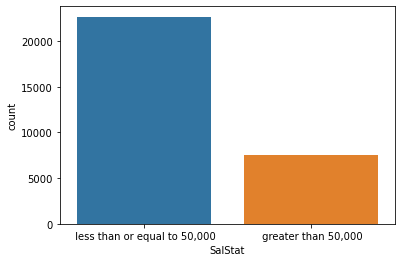

In [25]:
#frequency distribution 

SalStat = sns.countplot(data1['SalStat'])

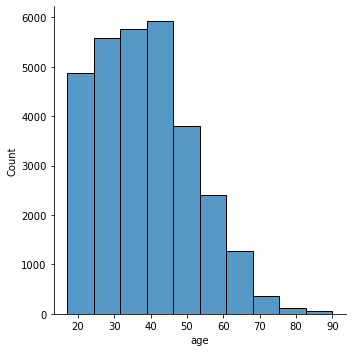

In [26]:
sns.displot(data1['age'],bins=10,kde=False)

C:\Users\Sanjay Khadka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

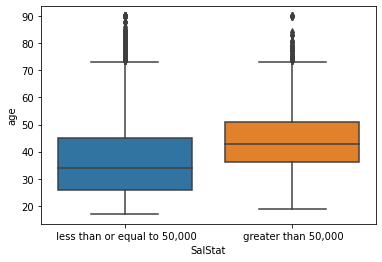

In [27]:
#Age vs Salstat

sns.boxplot('SalStat','age',data=data1)
data1.groupby('SalStat')['age'].median()

In [28]:
data1.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

<AxesSubplot:xlabel='JobType,SalStat'>

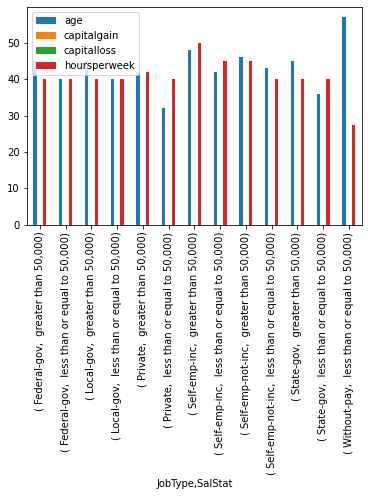

In [29]:
data1.groupby(['JobType','SalStat']).median().plot(kind='bar')


<AxesSubplot:xlabel='EdType,SalStat'>

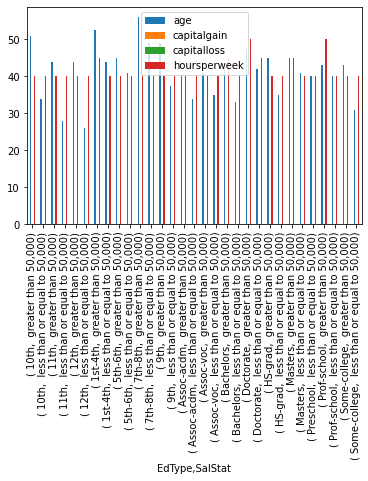

In [30]:
#education vs Salary status

data1.groupby(['EdType','SalStat']).median().plot(kind='bar')


<AxesSubplot:xlabel='occupation,SalStat'>

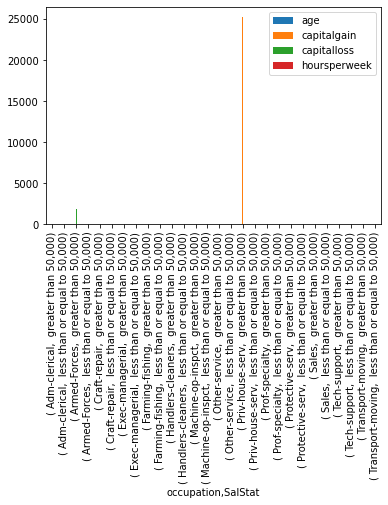

In [31]:
#occupation vs Salary status

data1.groupby(['occupation','SalStat']).median().plot(kind='bar')


In [32]:
#Logistic Regression Model

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [33]:
data1['SalStat'].value_counts(dropna=False)

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

In [34]:
data1['SalStat'] = data1['SalStat'].map(
                        {
                            ' less than or equal to 50,000': 0,
                            ' greater than 50,000' :1
                            
                        }
)

C:\Users\Sanjay Khadka\AppData\Local\Temp\ipykernel_11160\3997771817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SalStat'] = data1['SalStat'].map(


In [35]:
data1['SalStat'].value_counts()

0    22654
1     7508
Name: SalStat, dtype: int64

In [36]:
new_data = pd.get_dummies(data1,drop_first=True)

In [37]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#defining X and Y

column_list = new_data.columns.tolist()
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [39]:
feature_list = list(set(column_list)-set(['SalStat']))
feature_list

['race_ White',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'EdType_ Prof-school',
 'occupation_ Transport-moving',
 'nativecountry_ Thailand',
 'nativecountry_ Poland',
 'occupation_ Protective-serv',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'occupation_ Craft-repair',
 'nativecountry_ England',
 'JobType_ Private',
 'race_ Black',
 'nativecountry_ France',
 'JobType_ Without-pay',
 'nativecountry_ Jamaica',
 'EdType_ Doctorate',
 'EdType_ Preschool',
 'nativecountry_ Ecuador',
 'nativecountry_ Peru',
 'nativecountry_ Yugoslavia',
 'occupation_ Exec-managerial',
 'capitalgain',
 'nativecountry_ Mexico',
 'relationship_ Other-relative',
 'EdType_ Masters',
 'occupation_ Handlers-cleaners',
 'EdType_ 7th-8th',
 'nativecountry_ Guatemala',
 'occupation_ Armed-Forces',
 'EdType_ 12th',
 'nativecountry_ Scotland',
 'nativecountry_ Hong',
 'nativecountry_ Hungary',
 'maritalstatus_ Widowed',
 'EdType_ Assoc-voc',
 'occupation_ Other-s

In [40]:
y = new_data['SalStat']

In [41]:
y

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [42]:
X = new_data[feature_list]

In [43]:
X.shape, y.shape

((30162, 94), (30162,))

In [44]:
#train test split

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.25,random_state=0)

In [45]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((22621, 94), (22621,), (7541, 94), (7541,))

In [46]:
logistic = LogisticRegression()

In [47]:
#fitting or training the model

logistic.fit(train_X,train_y)

C:\Users\Sanjay Khadka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
logistic.coef_

array([[-4.26715342e-01,  1.10509725e+00, -2.04841824e-02,
         5.24812002e-01, -3.37808193e-01, -1.04926960e-02,
        -3.38181456e-02,  7.53052841e-02, -1.32401689e+00,
        -9.95558405e-01, -1.18379420e-01,  1.78173482e-02,
        -2.78543085e-01, -6.84159741e-01,  1.36429612e-02,
        -2.30801256e-02, -2.69179250e-02,  5.09803629e-01,
        -6.48547172e-02, -1.73761619e-02, -2.50083484e-02,
        -6.58751221e-03,  1.07145606e+00,  3.23625749e-04,
        -6.09683660e-01, -4.63762445e-01,  8.06765111e-01,
        -6.31269599e-01, -6.18408874e-01, -3.86407321e-02,
        -4.10687935e-03, -1.94782599e-01, -9.23810788e-03,
        -1.21470145e-02, -7.76130894e-03, -1.37694489e-01,
        -1.00799347e-01, -1.17675324e+00,  3.03600296e-01,
        -7.86589185e-01, -5.51962412e-02, -2.47825161e-02,
         1.87329090e-01, -5.95132250e-01, -6.01162756e-02,
         1.60643122e-02,  7.86253139e-01, -3.57240202e-01,
         4.57375261e-03, -1.06812012e-01, -3.99171367e-0

In [49]:
logistic.intercept_

array([-1.89415281])

In [50]:
#Prediction from test data

prediction = logistic.predict(test_X)
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
#Confusion Matrix

cm = confusion_matrix(test_y, prediction)
cm

array([[5235,  439],
       [ 791, 1076]], dtype=int64)

In [52]:
#Accuracy

accuracy_score = accuracy_score(test_y,prediction)
accuracy_score

0.8368916589311762

In [53]:
# Printing the misclassfied values from prediction

print("Misclassified sample: %d" %(test_y != prediction).sum())

Misclassified sample: 1230


# Import dataset

In [54]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data_income = pd.read_csv('income.csv')
data = data_income.copy()

In [55]:
#Logistic Regression - Removing Insignificant variables

data['SalStat'] = data['SalStat'].map(
                        {
                            ' less than or equal to 50,000': 0,
                            ' greater than 50,000' :1
                            
                        }
)

In [56]:
cols = ['gender','nativecountry','race','JobType']

In [57]:
new_data = data.drop(cols,axis=1)

In [58]:
new_data = pd.get_dummies(new_data,drop_first=False)

In [59]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 10th,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
#defining X and Y

column_list = new_data.columns.tolist()
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'EdType_ 10th',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupat

In [61]:
feature_list = list(set(column_list)-set(['SalStat']))
feature_list

['EdType_ Some-college',
 'EdType_ 9th',
 'occupation_ Adm-clerical',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 10th',
 'EdType_ Prof-school',
 'occupation_ Transport-moving',
 'occupation_ Protective-serv',
 'relationship_ Not-in-family',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'occupation_ Craft-repair',
 'capitalloss',
 'relationship_ Husband',
 'occupation_ ?',
 'occupation_ Tech-support',
 'occupation_ Machine-op-inspct',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Prof-specialty',
 'EdType_ Doctorate',
 'maritalstatus_ Never-married',
 'EdType_ Assoc-acdm',
 'EdType_ Preschool',
 'age',
 'occupation_ Sales',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Exec-managerial',
 'capitalgain',
 'maritalstatus_ Divorced',
 'relationship_ Wife',
 'EdType_ 1st-4th',
 'relationship_ Other-relative',
 'maritalstatus_ Separated',
 'EdType_ Masters',
 'occupation_ Handlers-cleaners',
 'EdType_ 7th-8th',
 'occupation_ Armed-Forces',
 'EdType_ 12th',
 'mari

In [62]:
#y = new_data['SalStat'].values

In [63]:
X1 = new_data.drop('SalStat',axis='columns')
y1 = new_data.SalStat

In [64]:
y1

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64

In [65]:
#X = new_data[feature_list]

In [66]:
X1

,age,capitalgain,capitalloss,hoursperweek,EdType_ 10th,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
train_X1,test_X1,train_y1,test_y1 = train_test_split(X1,y1,test_size=0.25,random_state=0)

In [68]:
logistic1 = LogisticRegression()

In [69]:
logistic1.fit(train_X1,train_y1)

C:\Users\Sanjay Khadka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
prediction1 = logistic1.predict(test_X1)
prediction1

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [71]:
cm1 = confusion_matrix(test_y1,prediction1)
cm1

array([[5690,  425],
       [ 805, 1075]], dtype=int64)

In [72]:
accuracy_score(test_y1,prediction1)

0.8461538461538461

In [73]:
# Printing the misclassfied values from prediction

print("Misclassified sample: %d" %(test_y1 != prediction1).sum())

Misclassified sample: 1230


# KNN Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [75]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)

In [76]:
KNN_Classifier.fit(train_X,train_y)

KNeighborsClassifier()

In [77]:
#predict
prediction_knn = KNN_Classifier.predict(test_X)

In [78]:
print(prediction_knn)

[0 0 0 ... 1 0 1]


In [79]:
#confusion matrix

confusion_matrix = confusion_matrix(test_y,prediction_knn)
confusion_matrix

array([[5138,  536],
       [ 692, 1175]], dtype=int64)

In [80]:
#accuracy

accuracy_score(test_y,prediction_knn)

0.8371568757459223

In [81]:
# Printing the misclassfied values from prediction

print("Misclassified sample: %d" %(test_y != prediction_knn).sum())

Misclassified sample: 1228


In [82]:
# Calculating error for k values between 1 and 20

Misclassified_sample = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_y)
    pred_i = knn.predict(test_X)
    Misclassified_sample.append((test_y != pred_i).sum())

In [83]:
print(Misclassified_sample)

[1439, 1254, 1265, 1184, 1228, 1165, 1192, 1194, 1212, 1190, 1196, 1172, 1182, 1180, 1195, 1176, 1178, 1151, 1178]
